In [1]:
# project: p1
# submitter: hseverson4
# partner: none
# hours: 8

In [2]:
import copy
import json
import pandas as pd
import os
import matplotlib.pyplot as plt
from subprocess import check_output, CalledProcessError, PIPE
import numpy as np
from time import time

In [3]:
#Q1: what is the type of 7/2?
type(7/2)

float

In [4]:
#Q2: what is error?
x = 4
maximum = 10
minimum = 5
error = x>maximum or x<minimum # True if x is outside the minimum-to-maximum range
error

True

In [5]:
#Q3: ignoring case, does word end with the suffix "esque"?
word = "KAFKAESQUE"
suffix_match = word.lower()[-5:]=="esque" # .endswith(...) method not allowed for this question! (practice slicing)
suffix_match

True

In [6]:
def add(x,y=1):
    return x+y

In [7]:
#Q4: what is add(3, 4)?
add(3,4)

7

In [8]:
#Q5: what is add(9)?
add(9)

10

In [9]:
#Q6: what is status?
x = 4
if x<0:
    status = "negative"
elif x>0:
    status = "positive"
else:
    status = "zero"
status

'positive'

In [10]:
nums = [3, 4, 1, 6]

def smart_count(lst):
    total=0
    for x in lst:
        if x>=10:
            continue
        elif x<0:
            break
        else:
            total+=x
    return total

In [11]:
#Q7: what is smart_count(nums)?
smart_count(nums)

14

In [12]:
#Q8: what is smart_count([2, 1, 11, 3, 15, -1, 8, 2])?
smart_count([2, 1, 11, 3, 15, -1, 8, 2])

6

In [13]:
header = ["A", "B", "C"]

coord1 = {"x": 8, "y": 5}
coord2 = {"x": 9, "y": 2}
coord3 = {"x": 3, "y": 1}

rows = [
    [1, 6, coord1],
    [3, 4, coord2],
    [5, 2, coord3],
]

In [14]:
#Q9: after inserting a "z" key in coord3 (with coord3["z"] = 3.14), what is rows?
coord3["z"]=3.14
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 4, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [15]:
#Q10: what is the value associated with the "x" key of the dict in the last position of the first list?
rows[0][-1]["x"]

8

In [16]:
#Q11: what is rows after running the following?
v2 = copy.copy(rows)
v2[0] = 8888    # first change
v2[1][1] = 9999 # second change
rows

[[1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}],
 [5, 2, {'x': 3, 'y': 1, 'z': 3.14}]]

In [17]:
#Q12: if we imagine the list of lists structure referenced by rows as a table, with column names in header, what is the sum of values in the "B" column?
pos=header.index("B")
tally=0
for i in range(len(rows)):
    tally+=rows[i][pos]
tally

10007

In [18]:
#Q13: what is rows after we sort it in-place by the "B" column, ascending?
rows.sort(key=lambda row: row[header.index("B")], reverse=False)
rows

[[5, 2, {'x': 3, 'y': 1, 'z': 3.14}],
 [1, 6, {'x': 8, 'y': 5}],
 [3, 9999, {'x': 9, 'y': 2}]]

In [19]:
#Q14: say you're going on vacation to Europe with 400 US dollars; how many Euros can you get at the current exchange rate?
f = open("usd.json")
data = f.read()
f.close()
json.loads(data)["eur"]["rate"]*400

358.547140191604

In [20]:
def divide(x,y):
    try:
        x/y
    except ZeroDivisionError:
        return float("nan")
    return x/y
        

In [21]:
#Q15: what is divide(3, 2)?
divide(3,2)

1.5

In [22]:
#Q16: what is divide(-3, 0)?
divide(-3,0)

nan

In [23]:
paths=os.listdir("home-computers")
years={}
for path in paths:
    year=int(path[7:11])
    data=pd.read_csv("home-computers/"+path,header=1).set_index("Geographic Area Name")
    years[year]=data

In [24]:
#Q17: what are the keys in years?
sorted(list(years.keys()))

[2013, 2014, 2015, 2016, 2017, 2018]

In [25]:
#Q18: how many households did Wisconsin have in 2018?
years[2018].loc["Wisconsin","Estimate!!Total"]

2371960

In [26]:
#Q19: how many total households in the US are estimated to not have any computer at home? (2018)
years[2018]["Estimate!!Total!!No Computer"].sum()

10285814

In [27]:
#Q20: what is the biggest per-state margin of error for "No Computer", as a fraction of the total estimate? (2018)
(years[2018]["Margin of Error!!Total!!No Computer"]/years[2018]["Estimate!!Total!!No Computer"]).max()

0.12375641594322287

In [28]:
#Q21: for Wisconsin and adjacent states, what percent of households are estimated to be without a computer? (2018)
states=["Illinois", "Indiana", "Iowa", "Michigan", "Minnesota", "Wisconsin"]
midwest_computerless={}
for state in states:
    percent=100*years[2018].loc[state,"Estimate!!Total!!No Computer"]/years[2018].loc[state,"Estimate!!Total"]
    midwest_computerless[state]=percent
midwest_computerless

{'Illinois': 8.524143737625554,
 'Indiana': 9.463486214247707,
 'Iowa': 9.468929459023103,
 'Michigan': 8.936374942955922,
 'Minnesota': 7.491847623005652,
 'Wisconsin': 9.582497175331794}

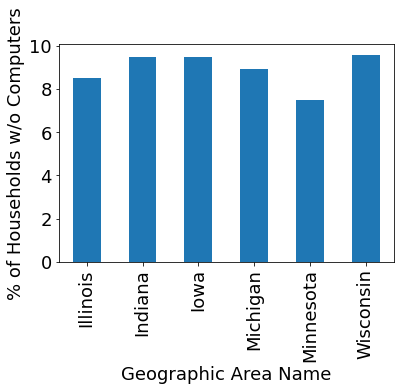

In [29]:
#Q22: same question, but answer with a bar plot.
ax=pd.Series(midwest_computerless).plot.bar(fontsize=18)
ax.set_xlabel("Geographic Area Name",fontsize=18)
ax.set_ylabel("% of Households w/o Computers",fontsize=18)
None

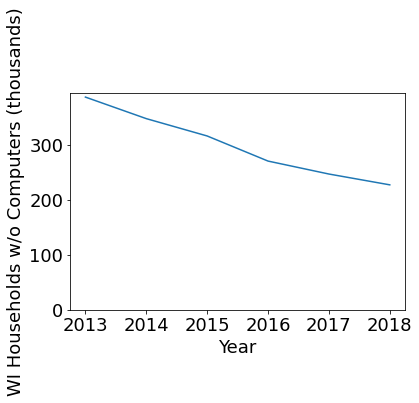

In [30]:
#Q23: how as the number of WI households without computers changed over recent years?
WI_computerless={}
for year in years:
    WI_computerless[year]=years[year].loc["Wisconsin","Estimate!!Total!!No Computer"]/1000
ax=pd.Series(WI_computerless).sort_index().plot.line(fontsize=18)
ax.set_ylim(ymin=0)
ax.set_xlabel("Year",fontsize=18)
ax.set_ylabel("WI Households w/o Computers (thousands)",fontsize=18)
plt.locator_params(axis="y", nbins=4)
None

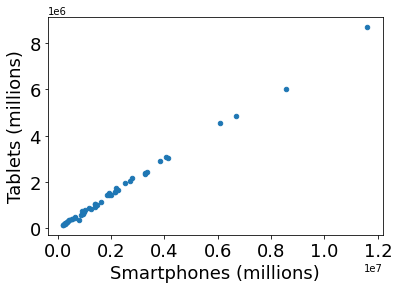

In [31]:
#Q24: what is the relationship between household with smartphones and those with tablets? (2018)
ax=years[2018].plot.scatter(x="Estimate!!Total!!Has one or more types of computing devices!!Smartphone",y="Estimate!!Total!!Has one or more types of computing devices!!Tablet or other portable wireless computer",fontsize=18)
ax.set_xlabel("Smartphones (millions)",fontsize=18)
ax.set_ylabel("Tablets (millions)",fontsize=18)
None

In [32]:
#Q25: what is the first line of output from git log when run in the flask repo directory?
result=check_output(["git","log"],cwd="flask")
result_str=str(result,encoding="utf-8")
result_list=result_str.split("\n")
result_list[0]

'commit 660994efc761efdfd49ca442b73f6712dc77b6cf'

In [33]:
#Q26: What are the commit numbers of the 50 earliest commits?
commit_nums=[]
for item in result_list:
    if item.startswith("commit"):
        commit_nums.append(item[7:])
commit_nums[-50:]

['7b5015010bc8c2a2d56c7c50b37e5b9facdad102',
 '40e0024d7b87150ed694829a5335bd2435962225',
 '6dd92ae4b32c336564231e10db12458a8b9261ca',
 '1246f4088a4fdc00a79f8029ff5d77bfe4fc9b14',
 'c4f5c2fb9afc1679c085500830bd53fab93ad885',
 '1d8432ebfd1637eacab79a15e9b7963bf061371c',
 'fc94599285aa1aec50b3c9426697249e55edda0a',
 'c33675f0251071ea47ce166b81ce8c637842f091',
 '2d9bb692728fd76b19e467499caa4f5fcb07aede',
 'ca520fb7e4c29afccc637e61c11429a0f3e8d5ad',
 '08f1f0dc32004fae01cf96d1eed84e6461e698e5',
 '8009bd986940378bba1399dbfce90d03e441467b',
 'a42728568e18bedf588be2357b56021ab85b9fad',
 '959b5df00431c436474c5abca304e631c0de7721',
 '4affedec356ad8c9e6a107578f03fc7f5c615064',
 'de03143f6ecf9a36dd32f16f07309c64d4de03b0',
 'a01e8b49ca66608f0bd46134ff02deeb5724c799',
 '36071ca1f42a26ef327e9d14e4909a8c92cd4fae',
 '51c9829a9cdfa2bf301431f686d7a404cc7c5083',
 '2f5a4f8dbc832b0daebcd66ea8b3969589191fa7',
 '03148dba6b26a2694da1d466584f50189c52e7b3',
 'ef524f2cfd65377b3b9ce896e7a710472b13c0f6',
 'f2dc38cd

In [34]:
#Q27: what did the README file contain after the 3rd commit?
check_output(["git","checkout",commit_nums[-3]],cwd="flask")
f=open("flask/README")
contents=f.read()
f.close()
contents

Note: switching to '4ec7d2a0d8eac4f915dc0d38a886cd57045bb0c4'.

You are in 'detached HEAD' state. You can look around, make experimental
changes and commit them, and you can discard any commits you make in this
state without impacting any branches by switching back to a branch.

If you want to create a new branch to retain commits you create, you may
do so (now or later) by using -c with the switch command. Example:

  git switch -c <new-branch-name>

Or undo this operation with:

  git switch -

Turn off this advice by setting config variable advice.detachedHead to false

HEAD is now at 4ec7d2a0 Started working on documentation.


"\n                        // Flask //\n\n     because a pocket knife is not the only thing that\n                    might come in handy\n\n\n    ~ What is Flask?\n\n      Flask is a microframework for Python based on Werkzeug\n      and Jinja2.  It's intended for small scale applications\n      and was development with best intentions in mind.\n\n   ~ Is it ready?\n\n      Nope, this is still work in progress, but I am happy to\n      accept patches and improvements already.\n"

In [35]:
#Q28: how many pull requests were merged from each GitHub user?
check_output(["git","checkout","main"],cwd="flask")
user_pull_requests={}
for item in result_list:
    if "Merge pull request" in item:
        split=item.split()
        for thing in split:
            if "/" in thing:
                user=thing.split("/")[0]
                if user in user_pull_requests:
                    user_pull_requests[user]+=1
                else:
                    user_pull_requests[user]=1
user_pull_requests

Previous HEAD position was 4ec7d2a0 Started working on documentation.
Switched to branch 'main'


{'Yourun-proger': 2,
 'olliemath': 1,
 'pallets': 204,
 'jugmac00': 1,
 'pgjones': 14,
 'eprigorodov': 1,
 'HenryKobin': 1,
 'delicb': 1,
 'vinzid': 1,
 'karintou8710': 1,
 'kkirsche': 2,
 'matipau': 1,
 'Makonede': 1,
 'sprutner': 1,
 'Jalkhov': 1,
 'KPLauritzen': 1,
 'greyli': 42,
 'esadek': 1,
 'na2shell': 1,
 'Rohan-Salwan': 1,
 'default-303': 1,
 'awijaya22': 1,
 'starlightknown': 1,
 'yuxiaoy1': 4,
 'kaushikk25': 1,
 'Elahi-cs': 1,
 'Hugo0': 1,
 'dannysepler': 1,
 'rafaVls': 1,
 'brettlangdon': 1,
 'oleksis': 1,
 'andrewjroth': 1,
 'ThiefMaster': 11,
 'kangetsu121': 1,
 'mbpreble': 1,
 'tonydelanuez': 1,
 'elliott-king': 1,
 'huimingz': 1,
 'lielfr': 1,
 'tirkarthi': 3,
 'nphilipp': 1,
 'WolframAlph': 1,
 'MLH-Fellowship': 2,
 'MartinThoma': 1,
 'ebonnecab': 1,
 'jackwardell': 3,
 'jab': 3,
 'DeepOde': 1,
 'stat1c-void': 1,
 'lgiordani': 1,
 'iomintz': 1,
 'jeffwidman': 8,
 'kx-chen': 1,
 'jeenuv': 1,
 'pgkrit': 1,
 'valleygtc': 1,
 'shanavas786': 1,
 'mattc41190': 2,
 'gnumoksha

In [36]:
#Q29: what is the output of pip3 instal? (yes, the mispelling was intentional)
try:
    check_output(["pip3", "instal"], stderr=PIPE)
except CalledProcessError as e:
    output = e.stderr
str(output,encoding="utf-8")

'ERROR: unknown command "instal" - maybe you meant "install"\n'

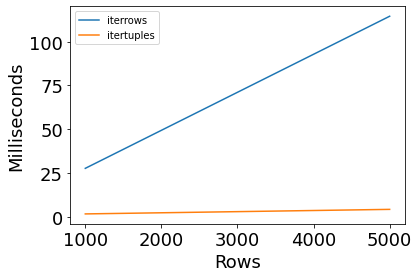

In [37]:
#Q30: what is faster for looping over a DataFrame, iterrows or itertuples?
def rand_df(rows):
    return pd.DataFrame(np.random.randint(10, size=(rows, 4)),
                        columns=["A", "B", "C", "D"],
                        index=[f"r{i}" for i in range(1, rows+1)])
df=rand_df(1000)
t0 = time()
for row in df.iterrows():
    pass
t1 = time()
time_iterrows_1000=t1-t0
t0=time()
for row in df.itertuples():
    pass
t1=time()
time_itertuples_1000=t1-t0
df=rand_df(5000)
t0 = time()
for row in df.iterrows():
    pass
t1 = time()
time_iterrows_5000=t1-t0
t0=time()
for row in df.itertuples():
    pass
t1=time()
time_itertuples_5000=t1-t0

times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "iterrows"] = time_iterrows_1000*1000
times_df.at[5000, "iterrows"] = time_iterrows_5000*1000
times_df.at[1000, "itertuples"] = time_itertuples_1000*1000
times_df.at[5000, "itertuples"] = time_itertuples_5000*1000
ax=times_df.plot.line(fontsize=18)
ax.set_xlabel("Rows",fontsize=18)
ax.set_ylabel("Milliseconds",fontsize=18)
plt.locator_params(nbins=5)
None

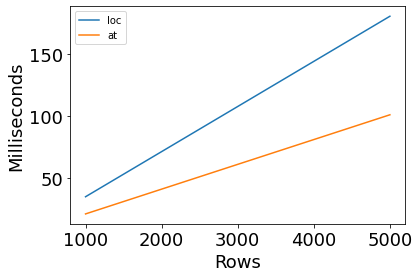

In [38]:
#Q31: what is faster, loc, or at?
t0=time()
total = 0
for idx in df.index:
    for col in df.columns:
        total += df.loc[idx, col]
t1=time()
time_loc_5000=t1-t0

t0=time()
total = 0
for idx in df.index:
    for col in df.columns:
        total += df.at[idx, col]
t1=time()
time_at_5000=t1-t0      
    
df=rand_df(1000)
t0=time()
total = 0
for idx in df.index:
    for col in df.columns:
        total += df.at[idx, col]
t1=time()
time_at_1000=t1-t0

t0=time()
total = 0
for idx in df.index:
    for col in df.columns:
        total += df.loc[idx, col]
t1=time()
time_loc_1000=t1-t0
        
times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "loc"] = time_loc_1000*1000
times_df.at[5000, "loc"] = time_loc_5000*1000
times_df.at[1000, "at"] = time_at_1000*1000
times_df.at[5000, "at"] = time_at_5000*1000
ax=times_df.plot.line(fontsize=18)
ax.set_xlabel("Rows",fontsize=18)
ax.set_ylabel("Milliseconds",fontsize=18)
plt.locator_params(nbins=5)

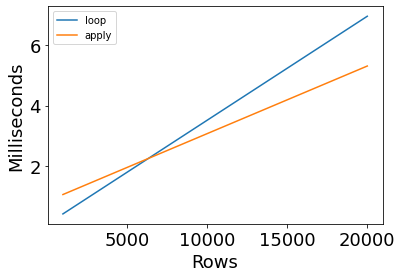

In [39]:
#Q32: what is faster, a loop or .apply?
def laugh(x):
    return "ha" * x

t0=time()
result = df["A"].apply(laugh).tolist()
t1=time()
apply1000=(t1-t0)*1000

t0=time()
result = []
for val in df["A"]:
    result.append(laugh(val))
t1=time()
loop1000=(t1-t0)*1000

df=rand_df(20000)
t0=time()
result = df["A"].apply(laugh).tolist()
t1=time()
apply20k=(t1-t0)*1000

t0=time()
result = []
for val in df["A"]:
    result.append(laugh(val))
t1=time()
loop20k=(t1-t0)*1000

times_df = pd.DataFrame(dtype=float)
times_df.at[1000, "loop"] = loop1000
times_df.at[20000, "loop"] = loop20k
times_df.at[1000, "apply"] = apply1000
times_df.at[20000, "apply"] = apply20k
ax=times_df.plot.line(fontsize=18)
ax.set_xlabel("Rows",fontsize=18)
ax.set_ylabel("Milliseconds",fontsize=18)
plt.locator_params(nbins=5)